In [92]:
import pandas as pd
import numpy as np

#from sklearn import datasets
#import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline #this tells jupyter to display graphs inline

import seaborn as sns
sns.set(style="ticks", color_codes=True)


UsageError: unrecognized arguments: #this tells jupyter to display graphs inline


In [93]:
df_adult=pd.read_csv("C:\\Users\\poonam\\Desktop\\FIU\\2020 Spring\\Data Mining\\Home work\\Assignment 3\\adult.data",header=None)
df_adult[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:
df_adult.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [95]:
df1=df_adult[[0,9,14]]
df1.columns=['Age','Gender','Income']
df1[:5]

,Age,Gender,Income
0,39,Male,<=50K
1,50,Male,<=50K
2,38,Male,<=50K
3,53,Male,<=50K
4,28,Female,<=50K


# Histogram 

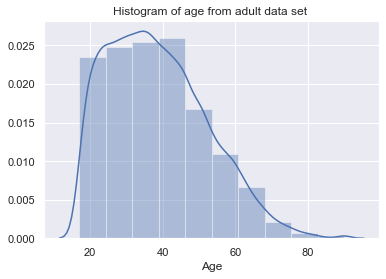

In [96]:
his0=sns.distplot(df1["Age"],bins=10)
his0.set_title("Histogram of age from adult data set ")
plt.show()

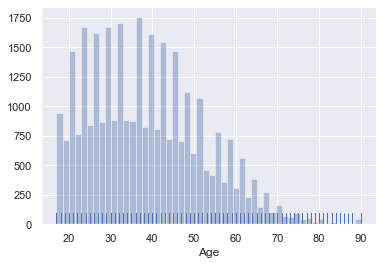

In [97]:
grid=sns.distplot(df1["Age"],kde=False,rug=True)
plt.show()


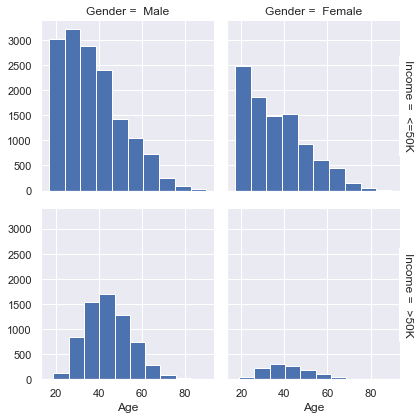

In [98]:
### Faceted Histogram of age by Gender and Income
grid = sns.FacetGrid(df1,  row="Income",col="Gender", margin_titles=True)
grid.map(plt.hist, "Age", bins=10)
plt.show();

# Bar Plot

 Male      21790
 Female    10771
Name: Gender, dtype: int64


Text(0.5, 0.98, 'Frequency of observations by gender')

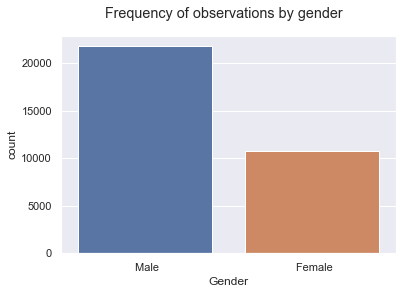

In [99]:
### countplot of Gender
print(df1['Gender'].value_counts())
sns.countplot(x='Gender', data = df1)
plt.suptitle('Frequency of observations by gender')

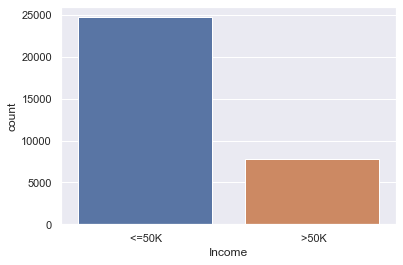

In [100]:
# countplot of Income
sns.countplot(x='Income',data=df1)


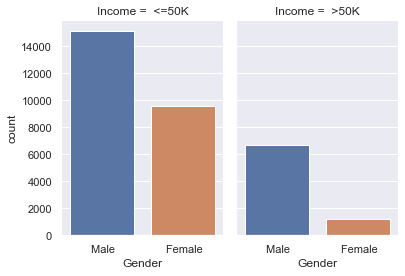

In [101]:
# Multidimensional Bar plot
sns.catplot(x="Gender",col="Income", data=df1, 
            kind="count", height=4, aspect=.7);

                 Age Gender  Income
count   32561.000000  32561   32561
unique           NaN      2       2
top              NaN   Male   <=50K
freq             NaN  21790   24720
mean       38.581647    NaN     NaN
std        13.640433    NaN     NaN
min        17.000000    NaN     NaN
25%        28.000000    NaN     NaN
50%        37.000000    NaN     NaN
75%        48.000000    NaN     NaN
max        90.000000    NaN     NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E75E210470>]],
      dtype=object)

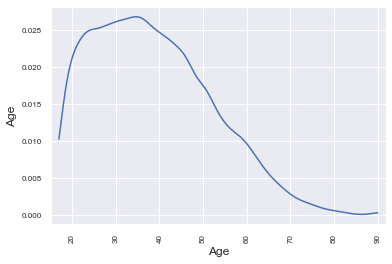

In [102]:
print(df1.describe(include='all'))
from pandas.plotting import scatter_matrix
df2 = pd.DataFrame(df1, columns = ['Age', 'Income', 'Gender'])
scatter_matrix(df2, alpha = 0.2, diagonal = 'kde')

# Box Plot

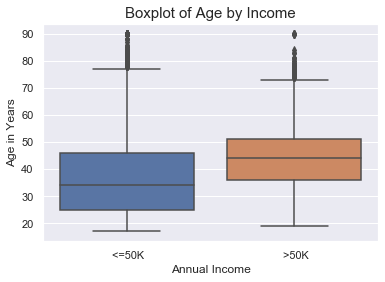

In [103]:
### Box Plot
ax = sns.boxplot(x="Income", y="Age", data=df1)
plt.title('Boxplot of Age by Income', fontsize=15)
plt.ylabel('Age in Years')
plt.xlabel('Annual Income')
plt.show()

# Pair Plot

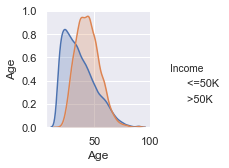

In [104]:
g=sns.pairplot(df1,hue="Income")


# Empirical cumulative Density Function (ECDF)

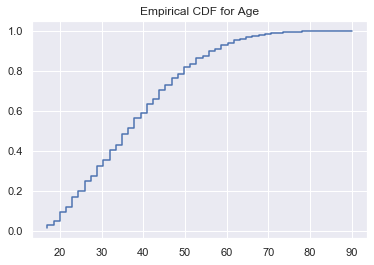

In [105]:
ecdf=sm.distributions.ECDF(df1['Age'])
x=np.linspace(df1['Age'].min(),df1['Age'].max())
y=ecdf(x)
plt.step(x,y)
plt.title('Empirical CDF for Age')
plt.show()